<a href="https://colab.research.google.com/github/reallylongaddress/abnb_preprocessor/blob/master/notebooks/abnb_listing_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://zohaib.me/debugging-in-google-collab-notebook/

# !pip install -Uqq ipdb
# import ipdb
# %pdb off



In [2]:
import os
import numpy as np
import pandas as pd
from google.colab import drive
from datetime import date
import matplotlib.pyplot as plt

import datetime
from datetime import date
from dateutil.relativedelta import relativedelta




# Questions/Things to Determine/Calculate
> * What inputs (bedrooms, ammenities, etc) are most correlated to price?
> * Are there key words in descriptive fields that correlate to price?

# Ave Occupancy
> * http://insideairbnb.com/data-assumptions/
> * **"The Occupancy Model"** section
> * **This will have to be calculated/determined**
> * https://www.researchgate.net/publication/350616868_Airbnb_listings'_performance_determinants_and_predictive_models

# Data Dictionary
> * https://docs.google.com/spreadsheets/d/1PgZXZTSM2w8DrxL_Wx5LTD-a6Vei1aNxx2-svO0N-XQ/edit#gid=1322284596

# Fields of likely value

> * **Text**
> * * name
> * * description
> * * bathrooms_text
> * * neighborhood_overview

> * **Categorical**
> * * neighbourhood_cleansed
> * * neighbourhood_group_cleansed
> * * property_type
> * * room_type
> * * has_availability
> * * instant_bookable

> * **Date/Time**
> * * host_since
> * * calendar_updated
> * * calendar_last_scraped
> * * first_review (C)
> * * last_review (C)
> * * last_scraped

> * **Numeric**
> * * host_since
> * * latitude
> * * longitude
> * * accommodates
> * * bathrooms
> * * bedrooms
> * * beds
> * * price
> * * minimum_nights
> * * maximum_nights
> * * minimum_minimum_nights (C)
> * * maximum_minimum_nights (C)
> * * minimum_maximum_nights (C)
> * * maximum_maximum_nights (C)
> * * minimum_nights_avg_ntm (C)
> * * maximum_nights_avg_ntm (C)
> * * availability_30 (C)
> * * availability_60 (C)
> * * availability_90 (C)
> * * availability_365 (C)
> * * calendar_last_scraped
> * * number_of_reviews
> * * number_of_reviews_ltm (C)
> * * number_of_reviews_l30d (C)
> * * review_scores_rating
> * * review_scores_accuracy
> * * review_scores_cleanliness
> * * review_scores_checkin
> * * review_scores_communication
> * * review_scores_location
> * * review_scores_value
> * * reviews_per_month (C)

> * **Nested**
> * * ammenities (Will have to parsed to categorical)


 **(C) = Value calculated by data provider**


In [3]:
drive = drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
# !ls ./drive/MyDrive/Colab_Data/AirBnb/Italy/Sicily

In [5]:
data_path = '/content/drive/My Drive/Colab_Data/AirBnb/Italy/Sicily/'

# os.listdir(data_path)

# **EDA**

### summary_listings.csv

In [6]:
#listing_summary_df = ls_df
ls_file_path = data_path + 'summary_listings.csv'
ls_df = pd.read_csv(ls_file_path)
ls_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,152203,SEA View Loft w/ PARKING - Catania,732329,Dan,NaN,Valverde,37.57492,15.13296,Entire home/apt,52,2,354,2022-06-19,2.70,3,94,36,NaN
1,60842,Oasis,293783,Giorgio,NaN,Aci Castello,37.55937,15.15967,Private room,86,1,18,2022-06-24,0.16,2,74,5,NaN
2,87488,Appartamenti a Salina-Camera Nonni,479157,Mario,NaN,Santa Marina Salina,38.54243,14.87020,Private room,25,1,12,2022-01-02,0.11,7,144,1,NaN
3,98571,Stanza Tommaso da Lampedusa,514653,Angelo,NaN,Lampedusa e Linosa,35.49865,12.60542,Entire home/apt,91,1,4,2017-07-15,0.03,4,338,0,NaN
4,179319,Steps from the Duomo and the Beach,858612,Nancy,NaN,Cefal,38.03982,14.02109,Entire home/apt,85,5,110,2021-09-22,0.90,1,311,4,NaN


In [7]:
ls_df.shape

(54622, 18)

In [8]:
ls_df.isnull().sum()

id                                    0
name                                  3
host_id                               0
host_name                            41
neighbourhood_group               54622
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       18745
reviews_per_month                 18745
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           52912
dtype: int64

In [9]:
#drop neighbourhood_group and license columns
ls_df.drop(columns=['neighbourhood_group', 'license'], inplace=True)
ls_df.shape

(54622, 16)

In [10]:
#fill name and host_name null with 'None'
ls_df[['name', 'host_name']] = ls_df[['name', 'host_name']].fillna(value='None')
ls_df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       18745
reviews_per_month                 18745
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

In [11]:
ls_df['room_type'].value_counts()

Entire home/apt    44693
Private room        9360
Hotel room           486
Shared room           83
Name: room_type, dtype: int64

In [12]:
import plotly.express as px

fig = px.scatter_geo(ls_df,
                     lat='latitude',lon='longitude', 
                     center={'lat': 37.653, 'lon': 14.074},
                     hover_name='id', 
                     color='room_type',
                     fitbounds='locations')
fig.update_layout(title = 'Sicily AirBnbs 25062022', title_x=0.5)
fig.show()

## detailed_listings.csv

In [13]:
#listing_detail_df = ld_df
ld_file_path = data_path + 'detailed_listings.csv'
ld_df_clean = pd.read_csv(ld_file_path, nrows=10000)

ld_df = ld_df_clean.copy()
ld_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,207654,https://www.airbnb.com/rooms/207654,20220625122941,2022-06-25,"Etna Holiday Home,Studio Melograno",It is a studio apartment with bathroom and kit...,"The house is very close to the ""Monti Rossi"", ...",https://a0.muscache.com/pictures/111476311/ba7...,848707,https://www.airbnb.com/users/show/848707,...,4.71,4.67,4.76,NaN,t,4,4,0,0,0.60
1,125569,https://www.airbnb.com/rooms/125569,20220625122941,2022-06-25,etna appartamento in villa Nicolosi,<b>The space</b><br />Nuovissimo appartamento ...,NaN,https://a0.muscache.com/pictures/1244569/27dbe...,623847,https://www.airbnb.com/users/show/623847,...,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN
2,702537,https://www.airbnb.com/rooms/702537,20220625122941,2022-06-25,LA VILLETTA SULLA SPIAGGIA,<b>The space</b><br />3384998890 La villetta s...,NaN,https://a0.muscache.com/pictures/9428704/58e0f...,13805839,https://www.airbnb.com/users/show/13805839,...,4.50,4.50,4.50,NaN,f,3,3,0,0,0.03
3,230912,https://www.airbnb.com/rooms/230912,20220625122941,2022-06-26,Affitto Villa San Vito Lo Capo,Villa per totale relax<br /><br /><b>The space...,NaN,https://a0.muscache.com/pictures/45340906/12c4...,1002197,https://www.airbnb.com/users/show/1002197,...,4.43,3.43,3.71,NaN,f,2,2,0,0,0.07
4,137342,https://www.airbnb.com/rooms/137342,20220625122941,2022-06-25,Villa with pool 4 Pax in Ragusa - Sicily,The house is a typical ancient holiday house r...,NaN,https://a0.muscache.com/pictures/869353/b96f65...,671577,https://www.airbnb.com/users/show/671577,...,5.00,4.60,5.00,NaN,f,2,2,0,0,0.08


In [14]:
ld_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [15]:
(ld_df.isnull().sum()).sort_values(ascending=False).head(30)

neighbourhood_group_cleansed    10000
bathrooms                       10000
calendar_updated                10000
license                          9703
host_neighbourhood               9694
host_about                       5821
neighborhood_overview            4779
neighbourhood                    4779
review_scores_value              3474
review_scores_location           3474
review_scores_communication      3474
review_scores_checkin            3474
review_scores_cleanliness        3472
review_scores_accuracy           3472
first_review                     3392
reviews_per_month                3392
last_review                      3392
review_scores_rating             3392
host_response_rate               1752
host_response_time               1752
host_acceptance_rate             1347
bedrooms                          266
description                       219
beds                              143
host_location                      26
bathrooms_text                     20
host_has_pro

In [16]:
ld_df.shape

(10000, 74)

### Cleanup Data

In [17]:
def clean_listing_details(df):
  df_clean = df.copy()
  print(f'a df_clean.shape: {df_clean.shape}')

  #drop any column where > 50% null
  thresh = len(df) * .5
  df_clean.dropna(thresh = thresh, axis = 1, inplace = True)
  print(f'b df_clean.shape: {df_clean.shape}')

  #drop any rows that have no reviews
  # df_clean = df_clean[df_clean['last_review'].notna()]
  # print(f'c df_clean.shape: {df_clean.shape}')
  # df_clean = df_clean[df_clean['review_scores_communication'].notna()]
  # print(f'd df_clean.shape: {df_clean.shape}')

  return df_clean

'''
Remove listings with no review in 6 months?
show only entire homes (no private/shared rooms)
'''


'\nRemove listings with no review in 6 months?\nshow only entire homes (no private/shared rooms)\n'

In [18]:
df_clean = clean_listing_details(ld_df)

a df_clean.shape: (10000, 74)
b df_clean.shape: (10000, 68)


#### 20220904 experiment


In [19]:
df = ld_df_clean.copy()

##### Convert price string to float

In [20]:
# prices = ['$33.00', '$4,330.00', '$90.00', '$0.00', '$250.00']

# for price in prices:

#   a = price[1:]
#   print(f'a: {a}')
#   b = a.replace(',', '')
#   print(f'b: {b}')
#   print(f'fb: {float(b)}')
#   #remove leading '$, remove ',', cast to int
#   c = (price[1:]).replace(',', '')
#   print(f'fc: {float(c)}')
  

#   fd = float((price[1:]).replace(',', ''))
#   print(f"fd: {fd}")
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [21]:
#remove leading '$, remove ',', cast to float
df['price_float'] = [float((price[1:]).replace(',', '')) for price in df['price']]
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_float
0,207654,https://www.airbnb.com/rooms/207654,20220625122941,2022-06-25,"Etna Holiday Home,Studio Melograno",It is a studio apartment with bathroom and kit...,"The house is very close to the ""Monti Rossi"", ...",https://a0.muscache.com/pictures/111476311/ba7...,848707,https://www.airbnb.com/users/show/848707,...,4.67,4.76,NaN,t,4,4,0,0,0.60,33.0
1,125569,https://www.airbnb.com/rooms/125569,20220625122941,2022-06-25,etna appartamento in villa Nicolosi,<b>The space</b><br />Nuovissimo appartamento ...,NaN,https://a0.muscache.com/pictures/1244569/27dbe...,623847,https://www.airbnb.com/users/show/623847,...,NaN,NaN,NaN,f,2,1,1,0,NaN,60.0
2,702537,https://www.airbnb.com/rooms/702537,20220625122941,2022-06-25,LA VILLETTA SULLA SPIAGGIA,<b>The space</b><br />3384998890 La villetta s...,NaN,https://a0.muscache.com/pictures/9428704/58e0f...,13805839,https://www.airbnb.com/users/show/13805839,...,4.50,4.50,NaN,f,3,3,0,0,0.03,430.0
3,230912,https://www.airbnb.com/rooms/230912,20220625122941,2022-06-26,Affitto Villa San Vito Lo Capo,Villa per totale relax<br /><br /><b>The space...,NaN,https://a0.muscache.com/pictures/45340906/12c4...,1002197,https://www.airbnb.com/users/show/1002197,...,3.43,3.71,NaN,f,2,2,0,0,0.07,90.0
4,137342,https://www.airbnb.com/rooms/137342,20220625122941,2022-06-25,Villa with pool 4 Pax in Ragusa - Sicily,The house is a typical ancient holiday house r...,NaN,https://a0.muscache.com/pictures/869353/b96f65...,671577,https://www.airbnb.com/users/show/671577,...,4.60,5.00,NaN,f,2,2,0,0,0.08,110.0


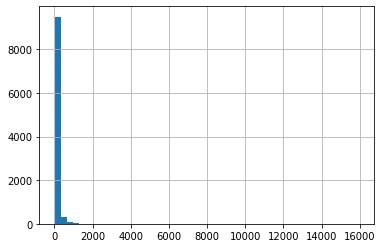

In [22]:
df['price_float'].hist(bins=50)

In [23]:
pf = df[df['price_float']<300]
pf.shape
#.hist(bins=50)

(9395, 75)

##### Drop unnecessary

In [24]:
# df = ld_df_clean.copy()

# Drop columns

drop_columns = ['scrape_id', 'last_scraped', 'name', 'description', 
                'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 
                'neighbourhood', 'host_name', 'host_location', 'host_thumbnail_url', 
                'license', 'host_about', 'host_neighbourhood', 'host_picture_url', 
                'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 
                'calendar_updated', 'bathrooms', 'host_has_profile_pic', 'calendar_last_scraped',
                'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
                'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                'host_listings_count', 'host_verifications', 'host_identity_verified', 'price']#, '', '', '', '', '']

df.drop(columns=drop_columns, inplace=True)

df.head()


,id,listing_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,price_float
0,207654,https://www.airbnb.com/rooms/207654,2011-07-21,within an hour,100%,100%,t,4.0,37.61484,15.01867,...,4.67,4.74,4.68,4.80,4.71,4.67,4.76,t,0.60,33.0
1,125569,https://www.airbnb.com/rooms/125569,2011-05-25,NaN,NaN,33%,f,4.0,37.61566,15.01782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,60.0
2,702537,https://www.airbnb.com/rooms/702537,2014-04-02,within a day,50%,30%,f,3.0,37.57494,12.74790,...,4.00,4.50,4.50,4.50,4.50,4.50,4.50,f,0.03,430.0
3,230912,https://www.airbnb.com/rooms/230912,2011-08-21,within a few hours,80%,46%,f,2.0,38.17447,12.75140,...,3.50,4.43,3.86,4.71,4.43,3.43,3.71,f,0.07,90.0
4,137342,https://www.airbnb.com/rooms/137342,2011-06-06,within an hour,100%,100%,f,1.0,36.92940,14.62523,...,4.80,5.00,4.90,5.00,5.00,4.60,5.00,f,0.08,110.0


In [25]:
df.columns

Index(['id', 'listing_url', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
   

##### Impute/Drop NA Rows

In [26]:
nulls = pd.DataFrame(df.isnull().sum(), columns=['num_null']).sort_values(by='num_null', ascending=False)
nulls.head(40)


,num_null
review_scores_location,3474
review_scores_value,3474
review_scores_checkin,3474
review_scores_communication,3474
review_scores_accuracy,3472
review_scores_cleanliness,3472
last_review,3392
review_scores_rating,3392
first_review,3392
reviews_per_month,3392


In [27]:
#Drop rows where the property has no reviews, scores, etc.  New or never used listing

print(df.shape)
na_cols = ['review_scores_cleanliness', 'review_scores_value', 'review_scores_accuracy', 
           'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
           'first_review', 'last_review', 'review_scores_rating', 'reviews_per_month', 
           'host_response_rate', 'host_response_time']
df.dropna(subset=na_cols, inplace=True)
print(df.shape)

(10000, 45)
(5647, 45)


In [28]:
nulls = pd.DataFrame(df.isnull().sum(), columns=['num_null']).sort_values(by='num_null', ascending=False)
nulls.head(40)

,num_null
bedrooms,162
host_acceptance_rate,137
beds,71
bathrooms_text,7
id,0
availability_60,0
availability_90,0
availability_365,0
number_of_reviews,0
number_of_reviews_ltm,0


In [29]:
df.columns

Index(['id', 'listing_url', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
   

##### Convert Categorical

In [30]:
#Drop unnecessary

##### Scale Numerical

In [31]:
# impute/drop

##### Feature Engieerning

In [32]:
# Convert Categorical


##### Drop unnecessary

In [33]:
# Scale Numerical

In [34]:
(df_clean.isnull().sum()).sort_values(ascending=False).head(30)

neighbourhood                  4779
neighborhood_overview          4779
review_scores_location         3474
review_scores_communication    3474
review_scores_checkin          3474
review_scores_value            3474
review_scores_accuracy         3472
review_scores_cleanliness      3472
review_scores_rating           3392
reviews_per_month              3392
last_review                    3392
first_review                   3392
host_response_time             1752
host_response_rate             1752
host_acceptance_rate           1347
bedrooms                        266
description                     219
beds                            143
host_location                    26
bathrooms_text                   20
host_identity_verified            6
host_has_profile_pic              6
host_listings_count               6
host_picture_url                  6
host_thumbnail_url                6
host_is_superhost                 6
host_since                        6
host_name                   

In [35]:
df_clean.sort_values(by='beds', ascending=False)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
8385,13426610,https://www.airbnb.com/rooms/13426610,20220625122941,2022-06-25,Grande villa con piscina in Sicilia a Marsala(tp),La villa è sita a Marsala in zona collinare a ...,Il quartiere è molto tranquillo e a pochi metr...,https://a0.muscache.com/pictures/e0f2c5be-9fe3...,24418805,https://www.airbnb.com/users/show/24418805,...,5.00,4.90,4.38,4.86,f,2,2,0,0,0.37
2049,8381158,https://www.airbnb.com/rooms/8381158,20220625122941,2022-06-26,6 Apartments in a Residence with sea and Etna ...,The Residence is located on a small hill in a ...,NaN,https://a0.muscache.com/pictures/106679852/e11...,19691694,https://www.airbnb.com/users/show/19691694,...,NaN,NaN,NaN,NaN,f,7,7,0,0,NaN
4802,29817638,https://www.airbnb.com/rooms/29817638,20220625122941,2022-06-25,Ramo d'Aria Country Villa,A “branch of air” on the slopes of volcano.<br...,NaN,https://a0.muscache.com/pictures/a7b58e81-4e15...,223311880,https://www.airbnb.com/users/show/223311880,...,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN
848,32708020,https://www.airbnb.com/rooms/32708020,20220625122941,2022-06-25,"Large property with Private Pool, Golf & Sea V...",Villa Green Unit 2 consists of a main living r...,The property is also not far from a public bea...,https://a0.muscache.com/pictures/9e15b3b8-e16b...,157753470,https://www.airbnb.com/users/show/157753470,...,NaN,NaN,NaN,NaN,t,17,17,0,0,NaN
7189,40271859,https://www.airbnb.com/rooms/40271859,20220625122941,2022-06-25,"benvenuti a ""la torre del sole""",La Casa Vacanze “LA TORRE DEL SOLE” si trova i...,NaN,https://a0.muscache.com/pictures/5a9c2626-24c2...,9134211,https://www.airbnb.com/users/show/9134211,...,3.00,3.00,3.00,3.00,f,1,0,1,0,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9572,643142,https://www.airbnb.com/rooms/643142,20220625122941,2022-06-25,Affittasi camera in villa,<b>The space</b><br />Signora affitta camera c...,NaN,https://a0.muscache.com/pictures/8299307/b747c...,3215632,https://www.airbnb.com/users/show/3215632,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
9675,50058669,https://www.airbnb.com/rooms/50058669,20220625122941,2022-06-25,Casa Vacanze Linangel a due passi dal centro,"Nel pieno centro di Agira, un grazioso bilocal...","Uno dei quartieri più tranquilli, centrali e s...",https://a0.muscache.com/pictures/9034f355-a1a1...,403786223,https://www.airbnb.com/users/show/403786223,...,5.00,4.50,5.00,5.00,f,1,1,0,0,0.30
9698,50837155,https://www.airbnb.com/rooms/50837155,20220625122941,2022-06-25,Hotel incantevole con idromassaggio esterno,"Una volta qui, non vorrai più andar via da que...",All'uscita di Linguaglossa direzione Etna nord,https://a0.muscache.com/pictures/miso/Hosting-...,410978211,https://www.airbnb.com/users/show/410978211,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
9709,50970031,https://www.airbnb.com/rooms/50970031,20220625122941,2022-06-25,4 BELLAVISTA RESIDENCE HOUSE STAGNONE MOZIA SA...,Case vacanze nei pressi dello Stagnone. Per gl...,NaN,https://a0.muscache.com/pictures/8b17ce52-f061...,407083201,https://www.airbnb.com/users/show/407083201,...,4.80,4.80,4.80,4.60,f,8,8,0,0,0.47


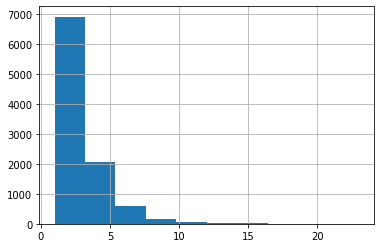

In [36]:
df_clean['beds'].hist()

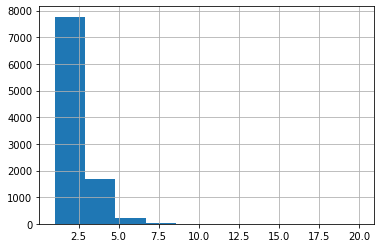

In [37]:
df_clean['bedrooms'].hist()

In [38]:
df_clean.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 68, dtype: object

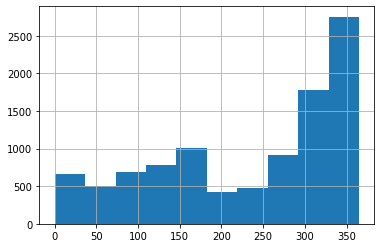

In [39]:
   
df_clean['availability_365'].hist()

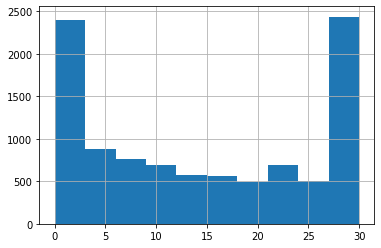

In [40]:
df_clean['availability_30'].hist()

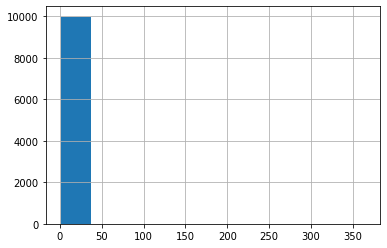

In [41]:

df_clean['minimum_nights'].hist()

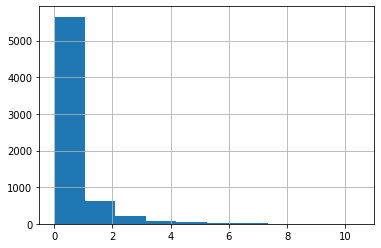

In [42]:
   
df_clean['reviews_per_month'].hist()

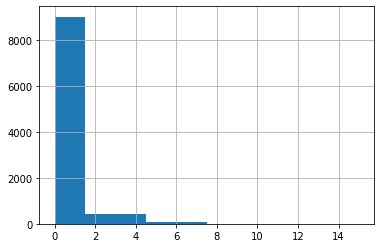

In [43]:

df_clean['number_of_reviews_l30d'].hist()

In [44]:
df_clean['number_of_reviews_l30d'].value_counts()

0     8011
1      992
2      432
3      268
4      144
5       74
6       48
7       13
8        7
9        7
15       1
11       1
14       1
10       1
Name: number_of_reviews_l30d, dtype: int64

In [45]:
df_clean.head()


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,207654,https://www.airbnb.com/rooms/207654,20220625122941,2022-06-25,"Etna Holiday Home,Studio Melograno",It is a studio apartment with bathroom and kit...,"The house is very close to the ""Monti Rossi"", ...",https://a0.muscache.com/pictures/111476311/ba7...,848707,https://www.airbnb.com/users/show/848707,...,4.80,4.71,4.67,4.76,t,4,4,0,0,0.60
1,125569,https://www.airbnb.com/rooms/125569,20220625122941,2022-06-25,etna appartamento in villa Nicolosi,<b>The space</b><br />Nuovissimo appartamento ...,NaN,https://a0.muscache.com/pictures/1244569/27dbe...,623847,https://www.airbnb.com/users/show/623847,...,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN
2,702537,https://www.airbnb.com/rooms/702537,20220625122941,2022-06-25,LA VILLETTA SULLA SPIAGGIA,<b>The space</b><br />3384998890 La villetta s...,NaN,https://a0.muscache.com/pictures/9428704/58e0f...,13805839,https://www.airbnb.com/users/show/13805839,...,4.50,4.50,4.50,4.50,f,3,3,0,0,0.03
3,230912,https://www.airbnb.com/rooms/230912,20220625122941,2022-06-26,Affitto Villa San Vito Lo Capo,Villa per totale relax<br /><br /><b>The space...,NaN,https://a0.muscache.com/pictures/45340906/12c4...,1002197,https://www.airbnb.com/users/show/1002197,...,4.71,4.43,3.43,3.71,f,2,2,0,0,0.07
4,137342,https://www.airbnb.com/rooms/137342,20220625122941,2022-06-25,Villa with pool 4 Pax in Ragusa - Sicily,The house is a typical ancient holiday house r...,NaN,https://a0.muscache.com/pictures/869353/b96f65...,671577,https://www.airbnb.com/users/show/671577,...,5.00,5.00,4.60,5.00,f,2,2,0,0,0.08


In [46]:
df_clean.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365

In [47]:
df_clean['room_type'].value_counts()

Entire home/apt    8206
Private room       1693
Hotel room           87
Shared room          14
Name: room_type, dtype: int64

In [48]:
df_clean['property_type'].value_counts()

Entire rental unit                   3112
Entire home                          1828
Entire villa                         1233
Entire condo                          851
Private room in bed and breakfast     656
                                     ... 
Room in casa particular                 1
Camper/RV                               1
Barn                                    1
Shared room in hostel                   1
Shared room in boat                     1
Name: property_type, Length: 78, dtype: int64

In [49]:
for index, row in df_clean.iterrows():
  print(f'{index}: {row["amenities"]}')
  
  if index >= 10:
    break


0: ["Hangers", "Luggage dropoff allowed", "Air conditioning", "Long term stays allowed", "Free street parking", "Wifi", "Stove", "Heating", "Refrigerator", "Crib", "Essentials", "TV", "Shampoo", "Free parking on premises", "Iron", "Host greets you", "Single level home", "Patio or balcony", "Cooking basics", "Kitchen", "Hot water", "Dishes and silverware", "Hair dryer"]
1: ["Hangers", "Air conditioning", "Stove", "Long term stays allowed", "Heating", "Patio or balcony", "Free parking on premises", "Wifi", "Refrigerator", "Cooking basics", "Essentials", "TV", "Kitchen", "Hot water", "Dishes and silverware", "Oven", "Hair dryer", "Bed linens"]
2: ["Hangers", "Single level home", "Stove", "Hair dryer", "Beachfront", "Long term stays allowed", "Free parking on premises", "Iron", "Wifi", "Refrigerator", "First aid kit", "TV", "Kitchen", "Hot water", "Dishes and silverware", "Oven", "Washer"]
3: ["Hangers", "Luggage dropoff allowed", "Air conditioning", "Long term stays allowed", "Children\u2

# Calculate average revenue

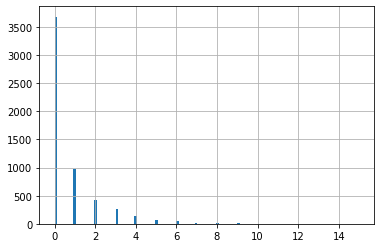

In [50]:

df['number_of_reviews_l30d'].hist(bins=130)

In [51]:
df['number_of_reviews_l30d'].value_counts()

0     3683
1      972
2      429
3      268
4      144
5       73
6       48
7       12
8        7
9        7
15       1
11       1
14       1
10       1
Name: number_of_reviews_l30d, dtype: int64

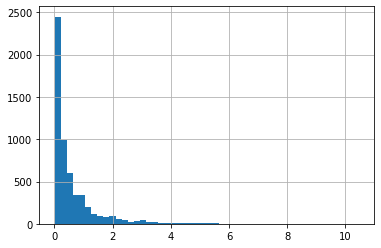

In [52]:
df['reviews_per_month'].hist(bins=50)

## filter by active and recent listings

In [53]:
#Filter by
## those with NO reviews
## those with NO reviews in X days
## those with zero reviews/month
## those with no reviews in 130 days (not active?)
def only_active_listings(df):
  print(f'only_active_listings: {df.shape}')
  #filter those with no reviews in 130 days
  df = df[df['number_of_reviews_l30d']>0]
  print(f'only_active_listings: {df.shape}')

  return df

In [54]:
ld_df_clean.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

## Calculate reviews within X year(s) of last_scrape

In [55]:
df_reviews_365 = ld_df_clean.copy()[['id', 'last_scraped',
                                    'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
                                    'maximum_minimum_nights', 'minimum_maximum_nights',
                                    'maximum_maximum_nights', 'minimum_nights_avg_ntm',
                                    'maximum_nights_avg_ntm', 'number_of_reviews_l30d'
                                     ]]

df_reviews_365.head()


,id,last_scraped,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_l30d
0,207654,2022-06-25,$33.00,2,90,2,2,90,90,2.0,90.0,0
1,125569,2022-06-25,$60.00,2,365,2,2,365,365,2.0,365.0,0
2,702537,2022-06-25,$430.00,4,40,4,4,40,40,4.0,40.0,0
3,230912,2022-06-26,$90.00,3,365,3,3,365,365,3.0,365.0,0
4,137342,2022-06-25,$110.00,6,730,5,6,730,730,6.0,730.0,1


In [56]:
df_reviews_365['price_float'] = [float((price[1:]).replace(',', '')) for price in df_reviews_365['price']]
df_reviews_365 = only_active_listings(df_reviews_365)
df_reviews_365

only_active_listings: (10000, 13)
only_active_listings: (1989, 13)


,id,last_scraped,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_l30d,price_float
4,137342,2022-06-25,$110.00,6,730,5,6,730,730,6.0,730.0,1,110.0
9,307482,2022-06-26,$145.00,3,1125,3,3,1125,1125,3.0,1125.0,1,145.0
13,3765138,2022-06-25,$56.00,1,1125,1,1,1125,1125,1.0,1125.0,1,56.0
18,3847293,2022-06-26,$54.00,3,1125,3,5,300,1125,3.2,1050.3,3,54.0
22,3882447,2022-06-26,$51.00,3,30,2,3,1125,1125,3.0,1125.0,1,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,18997350,2022-06-26,$104.00,6,1125,4,6,1125,1125,6.0,1125.0,2,104.0
9964,20601957,2022-06-25,$123.00,3,1125,3,3,1125,1125,3.0,1125.0,1,123.0
9967,17382274,2022-06-26,$50.00,2,29,2,2,1125,1125,2.0,1125.0,1,50.0
9982,24271237,2022-06-26,$50.00,4,31,4,4,1125,1125,4.0,1125.0,1,50.0


In [57]:
#load the reviews DF
reviews_file_path = data_path + 'summary_reviews.csv'
reviews_df = pd.read_csv(reviews_file_path)

#create a Date Object to compare gainst
reviews_df['DateObject']= pd.to_datetime(reviews_df['date'])


### Functions to calculate num reviews

In [58]:
def reviews_last_year(listing_id, last_scraped, num_years=1):

  since_date = np.datetime64(last_scraped - relativedelta(years=num_years))

  reviews = reviews_df[(reviews_df['listing_id'] == listing_id) & (reviews_df['DateObject'] >= since_date)]
  return len(reviews)

In [73]:
def calc_reviews_last_year(df, num_years=1):

  df.columns

  num_reviews_list = []
  # for i in range(len(df)): 
  for ind in df.index:
    listing_id = df['id'][ind]

    #look back from the last scraped date
    last_scraped_date = datetime.datetime.strptime(df['last_scraped'][ind], "%Y-%m-%d")
    
    num_reviews = reviews_last_year(listing_id, last_scraped_date, num_years=1)
    num_reviews_list.append(num_reviews)

  df[f'num_reviews_{num_years}_years'] = num_reviews_list
  return df

In [74]:
df_reviews_365.head()

,id,last_scraped,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_l30d,price_float,num_reviews_1_years
4,137342,2022-06-25,$110.00,6,730,5,6,730,730,6.0,730.0,1,110.0,2
9,307482,2022-06-26,$145.00,3,1125,3,3,1125,1125,3.0,1125.0,1,145.0,3
13,3765138,2022-06-25,$56.00,1,1125,1,1,1125,1125,1.0,1125.0,1,56.0,7
18,3847293,2022-06-26,$54.00,3,1125,3,5,300,1125,3.2,1050.3,3,54.0,15
22,3882447,2022-06-26,$51.00,3,30,2,3,1125,1125,3.0,1125.0,1,51.0,10


### Calculate num reviews

In [75]:
df_reviews_365.columns

Index(['id', 'last_scraped', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'number_of_reviews_l30d', 'price_float', 'num_reviews_1_years'],
      dtype='object')

In [76]:
df_reviews_365 = calc_reviews_last_year(df_reviews_365)

In [77]:
df_reviews_365.sort_values(by='num_reviews_1_years', ascending=False).head()


,id,last_scraped,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_l30d,price_float,num_reviews_1_years
992,41860846,2022-06-26,$44.00,1,90,1,1,1125,1125,1.0,1125.0,15,44.0,132
3490,10303931,2022-06-26,$63.00,1,1125,1,1,1125,1125,1.0,1125.0,14,63.0,100
1022,47852196,2022-06-26,$79.00,1,1125,1,1,1125,1125,1.0,1125.0,2,79.0,80
4078,6670295,2022-06-26,$85.00,2,1125,2,2,1125,1125,2.0,1125.0,5,85.0,79
6491,18118838,2022-06-26,$44.00,1,90,1,3,2,1125,1.2,995.7,4,44.0,75


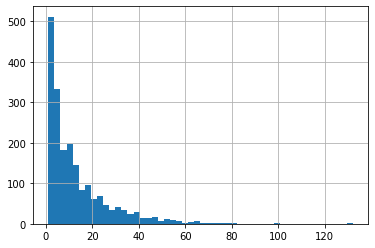

In [78]:
df_reviews_365['num_reviews_1_years'].hist(bins=50)

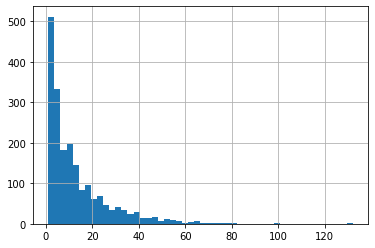

In [79]:
df_reviews_365[df_reviews_365['num_reviews_1_years']>0]['num_reviews_1_years'].hist(bins=50)

In [80]:
len_all = len(df_reviews_365['num_reviews_1_years'])
review_in_last_year = len(df_reviews_365[df_reviews_365['num_reviews_1_years']>0])
review_in_last_130_days = len(df_reviews_365[df_reviews_365['number_of_reviews_l30d']>0])
len_all, review_in_last_year, review_in_last_130_days

(1989, 1989, 1989)

## revenue equation/function

In [81]:
#ASSUMPTIONS
ave_length_of_stay = 5 #average length stay
bookings_per_review = 2 #for every review there were X bookings

In [84]:
#calculate annual revenue, using greater of average stay and minimium stay
def calculate_annual_revenue_1(df, ave_days=5):
  annual_revenue_list = []

  for ind in df.index:  
    num_days = ave_days
    if df['minimum_nights_avg_ntm'][ind] > num_days:
      num_days = df['minimum_nights_avg_ntm'][ind]

    #equation:  (2 * number_reviews) * (greater of average stay and minimium stay) * (daily price)
    annual_revenue = (bookings_per_review * df['num_reviews_1_years'][ind]) * num_days * df['price_float'][ind] 

    annual_revenue_list.append(annual_revenue)

  df['revenue_1'] = annual_revenue_list
  return df

#calculate annual revenue, ave_stay = min_stay
def calculate_annual_revenue_2(df):
  annual_revenue_list = []
  for ind in df.index:  

    #equation:  (2 * number_reviews) * (ave_min_stay) * (daily price)
    annual_revenue = (bookings_per_review * df['num_reviews_1_years'][ind]) * df['minimum_nights_avg_ntm'][ind] * df['price_float'][ind] 

    annual_revenue_list.append(annual_revenue)

  df['revenue_2'] = annual_revenue_list
  return df


In [85]:
df_revenue = df_reviews_365.copy()
df_revenue = calculate_annual_revenue_1(df_revenue)
df_revenue = calculate_annual_revenue_2(df_revenue)
df_revenue.head()

,id,last_scraped,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_l30d,price_float,num_reviews_1_years,revenue_1,revenue_2
4,137342,2022-06-25,$110.00,6,730,5,6,730,730,6.0,730.0,1,110.0,2,2640.0,2640.0
9,307482,2022-06-26,$145.00,3,1125,3,3,1125,1125,3.0,1125.0,1,145.0,3,4350.0,2610.0
13,3765138,2022-06-25,$56.00,1,1125,1,1,1125,1125,1.0,1125.0,1,56.0,7,3920.0,784.0
18,3847293,2022-06-26,$54.00,3,1125,3,5,300,1125,3.2,1050.3,3,54.0,15,8100.0,5184.0
22,3882447,2022-06-26,$51.00,3,30,2,3,1125,1125,3.0,1125.0,1,51.0,10,5100.0,3060.0


In [86]:
df_revenue.sort_values(by='revenue_2', ascending=False).head(40)

,id,last_scraped,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_l30d,price_float,num_reviews_1_years,revenue_1,revenue_2
2856,49360440,2022-06-26,$682.00,4,30,2,6,30,1125,4.2,706.3,2,682.0,10,68200.0,57288.0
5309,49313744,2022-06-26,$92.00,2,200,1,20,1000,1125,7.8,1084.8,7,92.0,39,55972.8,55972.8
731,30546339,2022-06-25,$452.00,7,30,4,7,30,30,6.7,30.0,1,452.0,9,54511.2,54511.2
8347,20702449,2022-06-25,"$1,000.00",3,1125,3,3,1125,1125,3.0,1125.0,2,1000.0,8,80000.0,48000.0
5410,51419912,2022-06-26,$462.00,3,29,2,3,1125,1125,2.8,1125.0,1,462.0,18,83160.0,46569.6
7263,33226578,2022-06-26,$279.00,5,365,3,20,1125,1125,7.3,1125.0,2,279.0,11,44807.4,44807.4
3996,37487942,2022-06-26,$265.00,7,1125,7,7,1125,1125,7.0,1125.0,1,265.0,12,44520.0,44520.0
8936,42875623,2022-06-26,$177.00,4,30,3,4,1125,1125,4.0,1125.0,5,177.0,31,54870.0,43896.0
6802,16170090,2022-06-26,$536.00,7,1125,5,13,50,1125,5.8,200.3,1,536.0,7,43523.2,43523.2
8468,19496282,2022-06-25,$329.00,3,1125,2,6,1125,1125,3.8,1125.0,2,329.0,17,55930.0,42506.8


In [87]:
df_revenue.sort_values(by='revenue_2', ascending=True).head(40)

,id,last_scraped,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_l30d,price_float,num_reviews_1_years,revenue_1,revenue_2
3044,600792051105747810,2022-06-25,$15.00,1,365,1,1,365,365,1.0,365.0,1,15.0,1,150.0,30.0
8053,628071601640159791,2022-06-26,$16.00,1,365,1,1,365,365,1.0,365.0,1,16.0,1,160.0,32.0
5404,51382065,2022-06-26,$23.00,1,1125,1,1,1125,1125,1.0,1125.0,1,23.0,1,230.0,46.0
6035,647732032869337175,2022-06-25,$32.00,1,365,1,1,365,365,1.0,365.0,1,32.0,1,320.0,64.0
1219,49067020,2022-06-25,$32.00,1,1125,1,1,1125,1125,1.0,1125.0,1,32.0,1,320.0,64.0
4565,644608068027032559,2022-06-25,$33.00,1,365,1,1,365,365,1.0,365.0,1,33.0,1,330.0,66.0
7797,53337735,2022-06-26,$35.00,1,365,1,1,365,365,1.0,365.0,1,35.0,1,350.0,70.0
9342,627002947764542177,2022-06-26,$35.00,1,365,1,1,1125,1125,1.0,1125.0,1,35.0,1,350.0,70.0
7860,610544677428019867,2022-06-25,$35.00,1,60,1,1,60,60,1.0,60.0,1,35.0,1,350.0,70.0
1328,654325933515922985,2022-06-26,$37.00,1,1125,1,1,1125,1125,1.0,1125.0,1,37.0,1,370.0,74.0


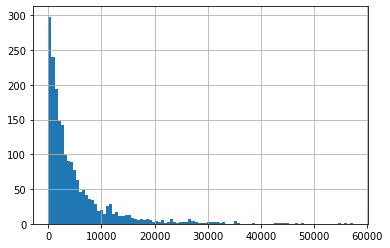

In [88]:
df_revenue['revenue_2'].hist(bins=100)

In [91]:
df_revenue.describe()

,id,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_l30d,price_float,num_reviews_1_years,revenue_1,revenue_2
count,1.989000e+03,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,7.137011e+16,2.380090,540.599296,2.211161,3.088989,795.721468,853.189040,2.493665,837.741629,2.088487,97.476621,12.959276,10682.992056,5076.113725
std,1.952202e+17,1.505298,518.888984,1.409102,2.272136,482.798726,451.185631,1.506385,452.188179,1.526497,110.284870,13.647910,12268.338716,6577.991019
min,3.263100e+04,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,12.000000,1.000000,150.000000,30.000000
25%,1.407118e+07,1.000000,29.000000,1.000000,2.000000,180.000000,365.000000,1.400000,365.000000,1.000000,51.000000,3.000000,2660.000000,1062.400000
50%,3.030743e+07,2.000000,365.000000,2.000000,3.000000,1125.000000,1125.000000,2.000000,1125.000000,2.000000,71.000000,8.000000,6279.000000,2756.000000
75%,4.818980e+07,3.000000,1125.000000,3.000000,4.000000,1125.000000,1125.000000,3.000000,1125.000000,3.000000,104.000000,18.000000,14250.000000,6384.000000
max,6.543259e+17,28.000000,1125.000000,28.000000,30.000000,1125.000000,1125.000000,28.000000,1125.000000,15.000000,2657.000000,132.000000,106810.000000,57288.000000
